#### **Imports**

In [123]:
from math import factorial
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from matplotlib.ticker import AutoMinorLocator

# For colors
colors = ['crimson','midnightblue', 'violet','orange','springgreen','dodgerblue','darkviolet', 'olive','tomato']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

#### **Exercise 1 + 2**

In [124]:
n , K , k = 60 , 100 , 10
N_ = (K / k) * n
print(f'N could be {int(N_)}, assuming that n/k is representative of the ratio of N to K')

N could be 600, assuming that n/k is representative of the ratio of N to K


In [125]:
def brac(X,Y):
    return factorial(X) / (factorial(Y) * factorial(X - Y) )

def flat_prior(N):
    flat_line = np.ones_like(N)
    return flat_line
    
def hyperbolic_prior(N):
    hyperbola = 1/N
    return hyperbola

def likelihood(N,K,n,k):
    return ( brac(K,k) * brac(N-K,n-k) ) / brac(N,n)

def posterior(N,K,n,k,prior=hyperbolic_prior):
    # likelihood = ( brac(K,k) * brac(N-K,n-k) ) / brac(N,n)
    return likelihood(N,K,n,k) * prior(N)


In [126]:
N_range = 2400 # Upper value of N to go to
n , K = 60 , 100 # n and K values
k_1 , k_2 = 10 , 15 # k values

Like_1 , Like_2 = [] , []
Prob_1 , Prob_2 = [] , []

for N in range(K + (n-k_1),N_range): # Must start at (K + (n - k) ) to ensure no (-1)!
    Like_1.append(likelihood(N,K,n,k_1))
    Prob_1.append(posterior(N,K,n,k_1))

for N in range(K + (n-k_2),N_range):
    Like_2.append(likelihood(N,K,n,k_2))
    Prob_2.append(posterior(N,K,n,k_2))

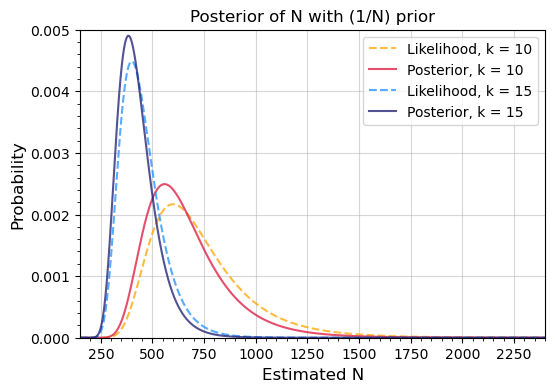

In [127]:
plt.figure(figsize=(6,4))

Like_1_int = np.trapz(Like_1,range(K + (n-k_1),N_range)) # Integrate to normalize
Like_2_int = np.trapz(Like_2,range(K + (n-k_2),N_range))
Prob_1_int = np.trapz(Prob_1,range(K + (n-k_1),N_range))
Prob_2_int = np.trapz(Prob_2,range(K + (n-k_2),N_range))

plt.plot(range(K + (n-k_1),N_range),Like_1 / Like_1_int, alpha = .75,linestyle='--',label='Likelihood, k = 10',color='orange')
plt.plot(range(K + (n-k_1),N_range),Prob_1 / Prob_1_int, alpha = .75,label='Posterior, k = 10')

plt.plot(range(K + (n-k_2),N_range),Like_2 / Like_2_int, alpha = .75,linestyle='--',label='Likelihood, k = 15',color='dodgerblue')
plt.plot(range(K + (n-k_2),N_range),Prob_2 / Prob_2_int, alpha = .75,label='Posterior, k = 15')

ax = plt.gca() # For setting sub-ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='minor', length=2, color='k')

plt.title('Posterior of N with (1/N) prior',fontsize=12)
plt.xlabel('Estimated N',fontsize=12)
plt.ylabel('Probability',fontsize=12)
plt.grid(True,alpha=0.5,zorder=-10)
plt.ylim(0,0.005)
plt.xlim(K + (n-k_1),N_range)
plt.legend()
plt.show()

In [128]:
Nrange_1 = list(range(K + (n-k_1),N_range))
Nrange_2 = list(range(K + (n-k_2),N_range))


max_prob_index = Prob_1.index( max(Prob_1) )  # Find the index of the maximum value
max_like_index = Like_1.index( max(Like_1) )  # Find the index of the maximum value

print(f'For k = 10, best bayesian estimate of N is {Nrange_1[max_prob_index]} for posterior and {Nrange_1[max_like_index]} for likelihood')

max_prob_index = Prob_2.index( max(Prob_2) )  # Find the index of the maximum value
max_like_index = Like_2.index( max(Like_2) )  # Find the index of the maximum value

print(f'For k = 15, best bayesian estimate of N is {Nrange_2[max_prob_index]} for posterior and {Nrange_2[max_like_index]} for likelihood')

For k = 10, best bayesian estimate of N is 559 for posterior and 600 for likelihood
For k = 15, best bayesian estimate of N is 384 for posterior and 399 for likelihood


#### **Exercise Fish**

In [129]:
lake_volume = 5000
lake_volume_sig = 300
volume_per_fish = 10 # 9.2
v_p_f_sig = 1 # 0.2

K = 50 # Number of fish tagged and released
n = 30 # Number of fish sampled from
k = 4  # How many fish tagged and sampled

fishes = lake_volume / volume_per_fish # Fish in the lake (N)

relative_uncertainty_fish = ((lake_volume_sig / lake_volume) ** 2 + (v_p_f_sig / volume_per_fish) ** 2) ** 0.5
delta_fishes = fishes * relative_uncertainty_fish
# delta_fishes = 2 * delta_fishes # Change delta_fish to something large

In [130]:
def gaussian_prior(N,loc=fishes,scale=delta_fishes):
    gauss = norm.pdf(N,loc,scale)
    return gauss

Prior says Fish = 500.0
Likelihood estimator says: Fish = 375 for k = 4
Posterior estimator says: Fish = 492 for k = 4
Likelihood estimator says: Fish = 187 for k = 8
Posterior estimator says: Fish = 458 for k = 8
Likelihood estimator says: Fish = 749 for k = 2
Posterior estimator says: Fish = 508 for k = 2


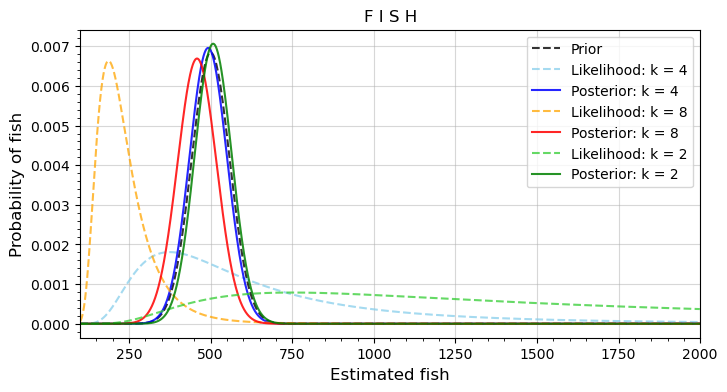

In [131]:
plt.figure(figsize=(8,4))

N_range = np.arange(100,2000,1).tolist()

gauss_priors = gaussian_prior(N_range)
integrated_prior = np.trapz(gauss_priors,N_range)

plt.plot(N_range,gauss_priors/integrated_prior, alpha = .8,linestyle='--',color='k',label=f'Prior')

print(f'Prior says Fish = {fishes}')

for k , color1 , color2 in zip([4,8,2],['skyblue','orange','limegreen'],['blue','red','green']):
    gauss_likelihoods = ([likelihood(N,K,n,k) for N in N_range])
    gauss_likeli_int = np.trapz(gauss_likelihoods,N_range)
    
    gauss_posteriors = ([posterior(N,K,n,k,prior=gaussian_prior) for N in N_range])
    gauss_posterior_int = np.trapz(gauss_posteriors,N_range)
    
    print(f'Likelihood estimator says: Fish = {N_range[gauss_likelihoods.index(max(gauss_likelihoods))]} for k = {k}')
    print(f'Posterior estimator says: Fish = {N_range[gauss_posteriors.index(max(gauss_posteriors))]} for k = {k}')
    
    plt.plot(N_range,gauss_likelihoods / gauss_likeli_int, alpha = .75,linestyle='--',label=f'Likelihood: k = {k}',color=f'{color1}')
    plt.plot(N_range,gauss_posteriors / gauss_posterior_int, alpha = .85,label=f'Posterior: k = {k}',color=f'{color2}')

ax = plt.gca() # For setting sub-ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='minor', length=2, color='k')

plt.title('F I S H',fontsize=12)
plt.xlabel('Estimated fish',fontsize=12)
plt.ylabel('Probability of fish',fontsize=12)
plt.grid(True,alpha=0.5,zorder=-10)
plt.legend()
plt.xlim(100,2000)
plt.show()